In [1]:

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print("✅ Sample Rows:")
display(df.head())

print("✅ Data Shape:", df.shape)


✅ Sample Rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


✅ Data Shape: (569, 31)


✅ Top Features by Importance:


,Feature,Importance
23,worst area,0.139357
27,worst concave points,0.132225
7,mean concave points,0.107046
20,worst radius,0.082848
22,worst perimeter,0.080850
2,mean perimeter,0.067990
6,mean concavity,0.066917
3,mean area,0.060462
26,worst concavity,0.037339
0,mean radius,0.034843


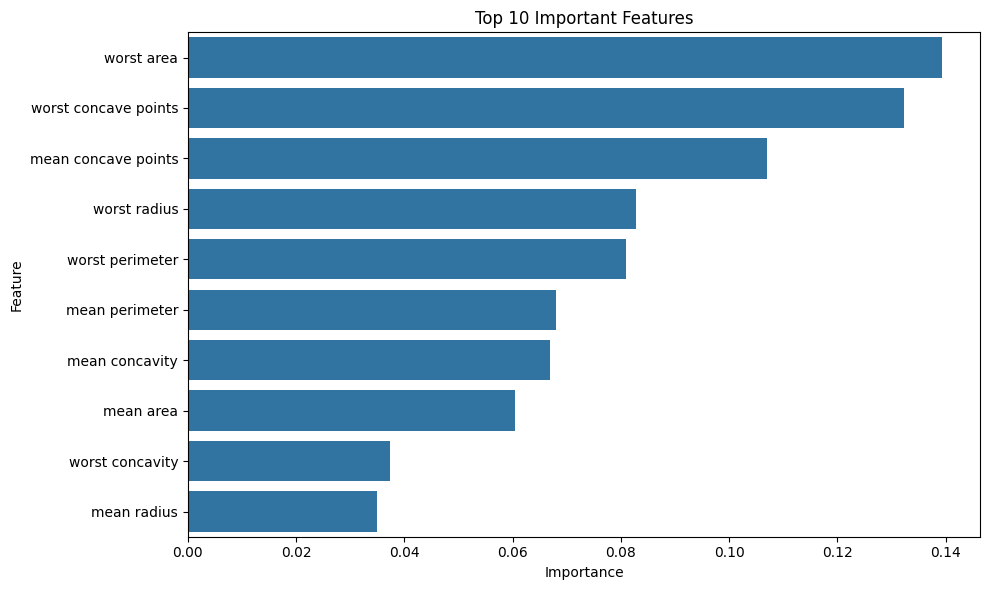

In [3]:
# Step 4: Use Random Forest to determine feature importance
X = cancer.data
y = cancer.target

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importance
importances = rf.feature_importances_
feature_names = cancer.feature_names

# Create DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 5: Display Feature Importance Table
print("✅ Top Features by Importance:")
display(importance_df.head(10))

# Step 6: Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()


In [4]:
# Step 7: Select Top 2 Features for SVM Visualization
top2_features = importance_df['Feature'].values[:2]
print(f"✅ Using Top 2 Features: {top2_features[0]}, {top2_features[1]}")

# Prepare data
X_top2 = df[top2_features].values
y = df['target'].values

# Standardize
scaler = StandardScaler()
X_top2_scaled = scaler.fit_transform(X_top2)

# Step 8: Train SVM using top 2 features
svm = SVC(kernel='rbf', gamma=0.3, C=1.0)
svm.fit(X_top2_scaled, y)


✅ Using Top 2 Features: worst area, worst concave points


SVC(gamma=0.3)

✅ Using Top 2 Features: worst area, worst concave points
Accuracy (Top 2 Features, Test Data): 0.96


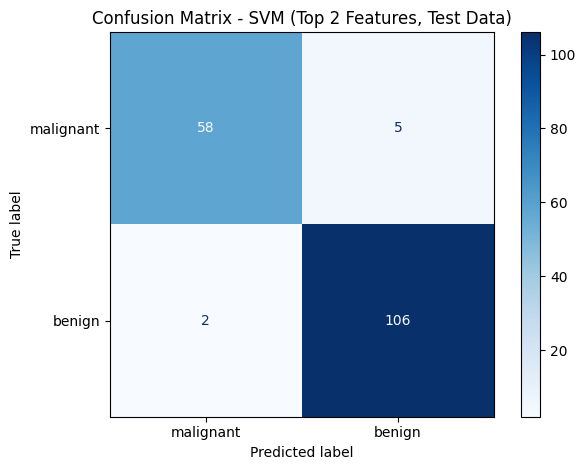

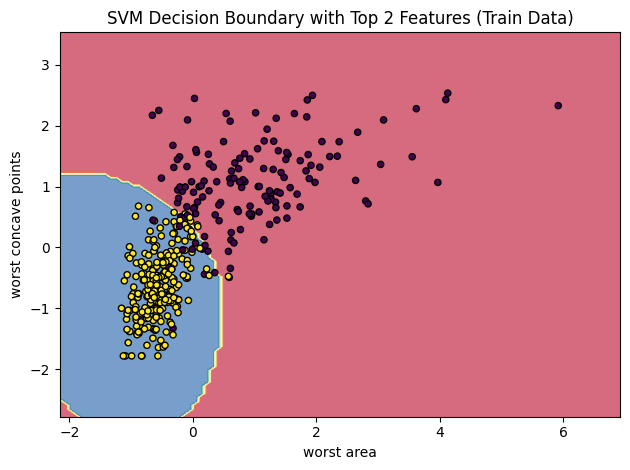

In [5]:
#Plot Decision Boundary for top 2 features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Assume df is your pandas DataFrame and importance_df contains feature importance
top2_features = importance_df['Feature'].values[:2]
print(f"✅ Using Top 2 Features: {top2_features[0]}, {top2_features[1]}")

X_top2 = df[top2_features].values
y = df['target'].values

# Train/test split before scaling
X_train_top2, X_test_top2, y_train_top2, y_test_top2 = train_test_split(
    X_top2, y, test_size=0.3, random_state=42)

# Scale features (fit scaler on train only)
scaler = StandardScaler()
X_train_top2_scaled = scaler.fit_transform(X_train_top2)
X_test_top2_scaled = scaler.transform(X_test_top2)

# Train SVM on train set
svm = SVC(kernel='rbf', gamma=0.3, C=1.0)
svm.fit(X_train_top2_scaled, y_train_top2)

# Predict & evaluate on test set
y_pred_test = svm.predict(X_test_top2_scaled)
accuracy_test = accuracy_score(y_test_top2, y_pred_test)
print(f"Accuracy (Top 2 Features, Test Data): {accuracy_test:.2f}")

# Plot confusion matrix for test set
ConfusionMatrixDisplay.from_predictions(
    y_true=y_test_top2,
    y_pred=y_pred_test,
    display_labels=cancer.target_names,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - SVM (Top 2 Features, Test Data)")
plt.tight_layout()
plt.show()

# Plot decision boundary on training data
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train_top2_scaled,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.7,
    xlabel=top2_features[0],
    ylabel=top2_features[1],
)
plt.scatter(X_train_top2_scaled[:, 0], X_train_top2_scaled[:, 1],
            c=y_train_top2, s=20, edgecolors="k")
plt.title("SVM Decision Boundary with Top 2 Features (Train Data)")
plt.tight_layout()
plt.show()


🔧 Best Parameters: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
✅ Tuned Accuracy (All Features): 0.9825


/tmp/ipython-input-6-596220525.py:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


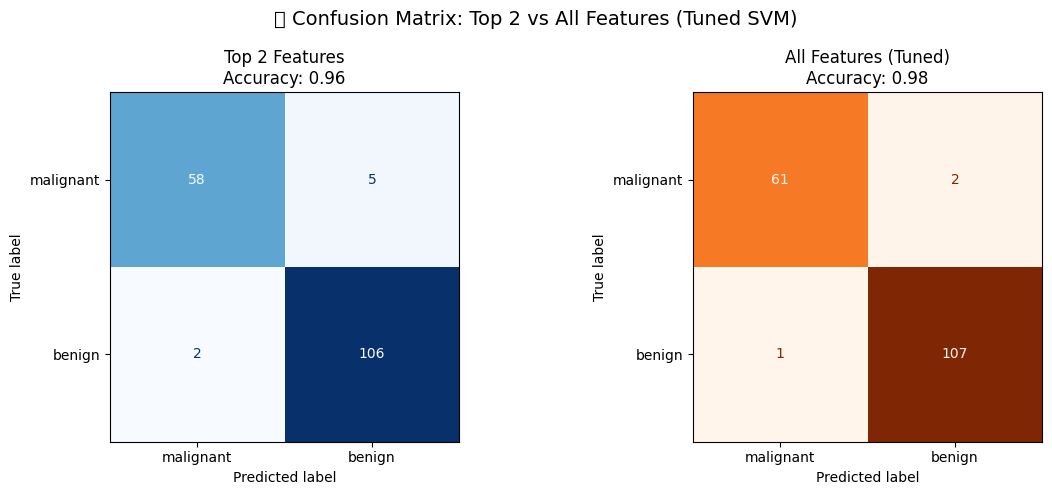

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ✅ Prepare full feature data
X_all = df.drop(columns=['target']).values
y = df['target'].values

# ✅ Same split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y, test_size=0.3, random_state=42)

# ✅ Scale
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)

# ✅ Grid Search for SVM
param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.01, 0.1, 0.3, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
grid.fit(X_train_all_scaled, y_train_all)

# ✅ Best model & accuracy
best_svm = grid.best_estimator_
print(f"🔧 Best Parameters: {grid.best_params_}")
y_pred_all = best_svm.predict(X_test_all_scaled)
acc_all = accuracy_score(y_test_all, y_pred_all)
print(f"✅ Tuned Accuracy (All Features): {acc_all:.4f}")

# ✅ Plot confusion matrices side by side
cm_top2 = confusion_matrix(y_test_top2, y_pred_test)
cm_all = confusion_matrix(y_test_all, y_pred_all)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Top 2 Features
disp1 = ConfusionMatrixDisplay(cm_top2, display_labels=cancer.target_names)
disp1.plot(ax=axes[0], cmap=plt.cm.Blues, colorbar=False)
axes[0].set_title(f"Top 2 Features\nAccuracy: {accuracy_test:.2f}")

# All Features (Tuned)
disp2 = ConfusionMatrixDisplay(cm_all, display_labels=cancer.target_names)
disp2.plot(ax=axes[1], cmap=plt.cm.Oranges, colorbar=False)
axes[1].set_title(f"All Features (Tuned)\nAccuracy: {acc_all:.2f}")

plt.suptitle("🔍 Confusion Matrix: Top 2 vs All Features (Tuned SVM)", fontsize=14)
plt.tight_layout()
plt.show()
